In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv file to dataframe
df1 = pd.read_csv('station_day.csv')
df1.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,26-08-2018,15.05,43.47,3.30,14.59,10.44,19.91,0.95,10.12,22.85,0.10,0.04,NaN,78,Satisfactory
1,AP001,27-08-2018,10.10,23.92,4.73,13.33,11.02,19.26,0.87,9.24,20.67,0.10,0.08,0.10,66,Satisfactory
2,AP001,28-08-2018,14.43,43.47,6.66,16.04,14.03,17.73,0.95,9.76,24.54,0.09,0.06,0.13,61,Satisfactory
3,AP001,29-08-2018,22.65,57.46,4.52,16.80,12.70,19.88,1.18,8.89,29.44,0.10,0.08,0.10,83,Satisfactory
4,AP001,30-08-2018,28.45,81.89,6.68,19.36,15.81,20.70,1.39,9.78,29.76,0.10,0.07,0.10,87,Satisfactory


In [3]:
#reading the second csv file to dataframe
df2 = pd.read_csv('stations.csv')
df2.head()

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active


In [4]:
#combining both dataframe to form a single df with all details
df = df2.merge(df1,on='StationId',how='inner')

In [5]:
df.head()

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,26-08-2018,15.05,43.47,3.30,14.59,10.44,19.91,0.95,10.12,22.85,0.10,0.04,NaN,78,Satisfactory
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,27-08-2018,10.10,23.92,4.73,13.33,11.02,19.26,0.87,9.24,20.67,0.10,0.08,0.10,66,Satisfactory
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,28-08-2018,14.43,43.47,6.66,16.04,14.03,17.73,0.95,9.76,24.54,0.09,0.06,0.13,61,Satisfactory
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,29-08-2018,22.65,57.46,4.52,16.80,12.70,19.88,1.18,8.89,29.44,0.10,0.08,0.10,83,Satisfactory
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,30-08-2018,28.45,81.89,6.68,19.36,15.81,20.70,1.39,9.78,29.76,0.10,0.07,0.10,87,Satisfactory


In [6]:
df.shape

(14863, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14863 entries, 0 to 14862
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StationId    14863 non-null  object 
 1   StationName  14863 non-null  object 
 2   City         14863 non-null  object 
 3   State        14863 non-null  object 
 4   Status       14709 non-null  object 
 5   Date         14863 non-null  object 
 6   PM2.5        14732 non-null  float64
 7   PM10         12794 non-null  float64
 8   NO           14468 non-null  float64
 9   NO2          14561 non-null  float64
 10  NOx          14490 non-null  float64
 11  NH3          12049 non-null  float64
 12  CO           14499 non-null  float64
 13  SO2          14037 non-null  float64
 14  O3           14223 non-null  float64
 15  Benzene      13711 non-null  float64
 16  Toluene      12370 non-null  float64
 17  Xylene       7917 non-null   float64
 18  AQI          14863 non-null  int64  
 19  AQI_

In [8]:
#checking for null values
df.isnull().sum()

StationId         0
StationName       0
City              0
State             0
Status          154
Date              0
PM2.5           131
PM10           2069
NO              395
NO2             302
NOx             373
NH3            2814
CO              364
SO2             826
O3              640
Benzene        1152
Toluene        2493
Xylene         6946
AQI               0
AQI_Bucket        0
dtype: int64

In [9]:
#checking for duplicates
df.duplicated().sum()

131

In [10]:
#removing duplicates 
df.drop_duplicates(inplace=True)

In [11]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Status',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene']

### Exploratory Data Analysis

In [12]:
#copying the current datset into another specifically for EDA alone
df_EDA = df.copy()

<AxesSubplot:>

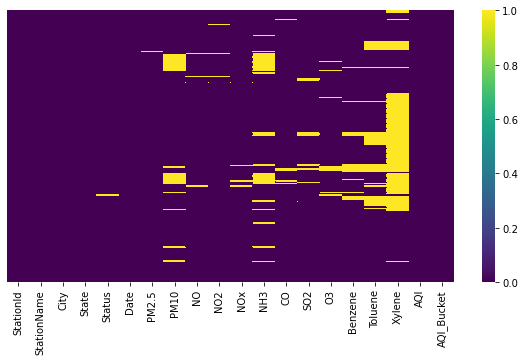

In [15]:
#Plotting the missing values in the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df_EDA.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:>

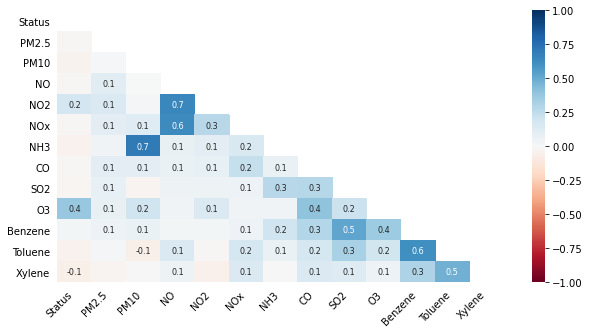

In [16]:
#importing missino package and plotting a heatmp to understand the correlation of missing value with each columns
import missingno as msno
msno.heatmap(df_EDA,figsize = (10,5),fontsize=10)

<AxesSubplot:>

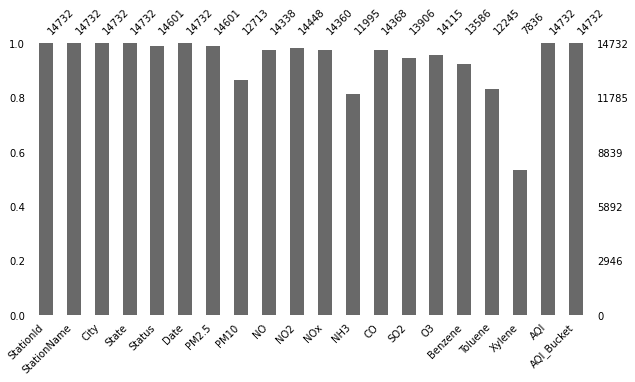

In [17]:
msno.bar(df_EDA,figsize=(10,5),fontsize=10)

The above heatmap and barplt clearly represent that, there is missing values in 13 fields and more missing values is prresent in Xylene and NH3. there is a high corelatin between NO2 and NO,NH3 and PM10 ,Benzene and Toluene says that if the value of one variable is present then the value of other is likely to be present

In [20]:
#Adding date and year fields into the dataframe after extracting the same from Date field
df_EDA['Month'] = pd.DatetimeIndex(df_EDA['Date']).strftime("%b")
df_EDA['Year'] = pd.DatetimeIndex(df_EDA['Date']).year

In [21]:
df_EDA.head()

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,...,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,Month,Year
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,26-08-2018,15.05,43.47,3.30,14.59,...,0.95,10.12,22.85,0.10,0.04,NaN,78,Satisfactory,Aug,2018
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,27-08-2018,10.10,23.92,4.73,13.33,...,0.87,9.24,20.67,0.10,0.08,0.10,66,Satisfactory,Aug,2018
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,28-08-2018,14.43,43.47,6.66,16.04,...,0.95,9.76,24.54,0.09,0.06,0.13,61,Satisfactory,Aug,2018
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,29-08-2018,22.65,57.46,4.52,16.80,...,1.18,8.89,29.44,0.10,0.08,0.10,83,Satisfactory,Aug,2018
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,30-08-2018,28.45,81.89,6.68,19.36,...,1.39,9.78,29.76,0.10,0.07,0.10,87,Satisfactory,Aug,2018


In [22]:
df_EDA['Year'].value_counts()

2019    5228
2020    4226
2018    3176
2017    1138
2016     719
2015     245
Name: Year, dtype: int64

In [28]:
df_EDA.columns

Index(['StationId', 'StationName', 'City', 'State', 'Status', 'Date', 'PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'Month', 'Year'],
      dtype='object')

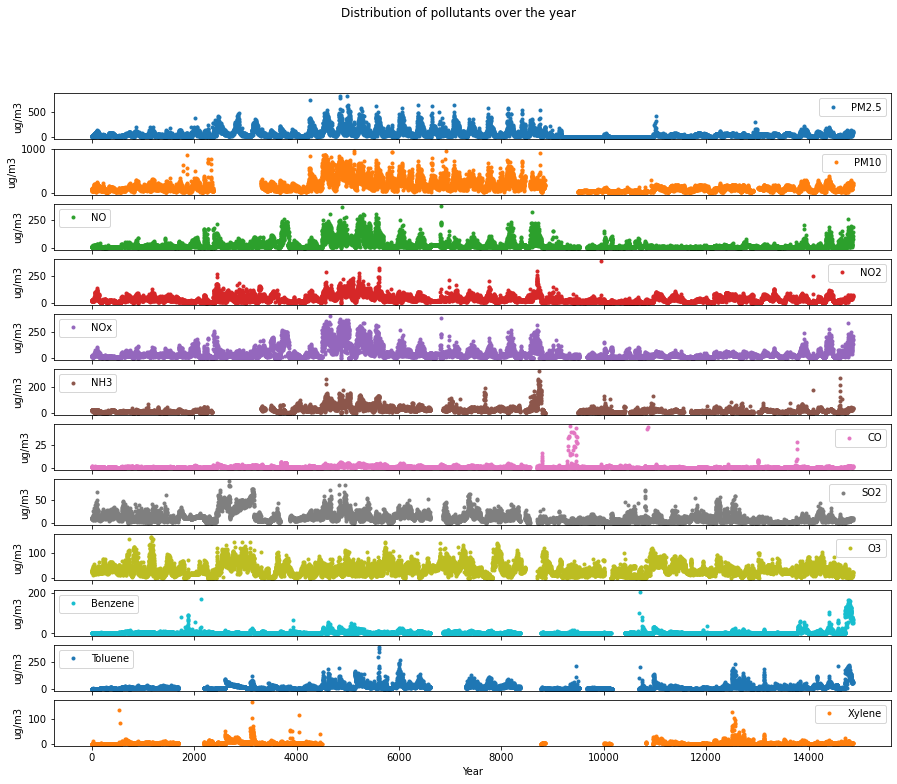

In [67]:
#Plotting the data on pollutants to see how different pollutants are distributed through out the year

pollutants = ['PM2.5','PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene','Toluene', 'Xylene']
axes = df_EDA[pollutants].plot(marker='.',alpha = 1, linestyle = 'None', figsize = (15,12), subplots = True,
                               title='Distribution of pollutants over the year')

for ax in axes:
    ax.set_xlabel('Year')
    ax.set_ylabel('ug/m3')

Here the plot gives us the information that the amount of PM2.5,PM10 and O3 are higher through out the year.Where as the amount of CO in the atmosphere is less through out the year


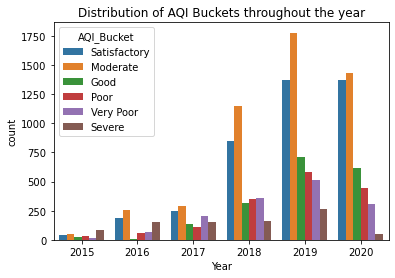

In [69]:
plt.title('Distribution of AQI Buckets throughout the year')
sns.countplot(x='Year', data=df_EDA, hue='AQI_Bucket');

* 2019 and 2020 are the years which have the highest moderate and satisfactory buckets
* But there is reduction in the quality of airin the year 2020 compared 2019

Minimum and maximum range of AQI: 8 - 956


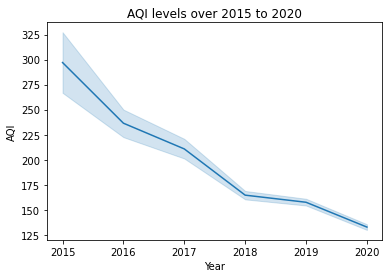

In [70]:
print(f"Minimum and maximum range of AQI: {df_EDA.AQI.min()} - {df_EDA.AQI.max()}")
plt.title('AQI levels over 2015 to 2020')
sns.lineplot(x='Year',y='AQI', data=df_EDA);

The line plot tells us that there is decline in AQI levels over the years which is good thing as it shows an increase in quality of air

<AxesSubplot:title={'center':'AQI levels over 2020'}, xlabel='Month', ylabel='AQI'>

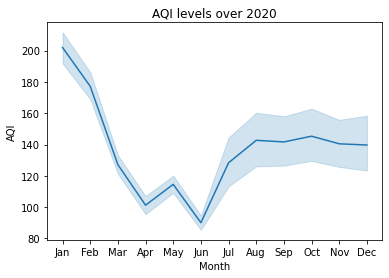

In [71]:
#Level of AQI in the year of 2020 after lockdown
df_covid = df_EDA[df_EDA.Year==2020]
plt.title('AQI levels over 2020')
sns.lineplot(x='Month',y='AQI', data=df_covid)

The line plot clearly represent that there is huge increase in Air quality in the month of April as there was a lockdown by government and we can see the quality of air decreased post lockdown from June

<AxesSubplot:xlabel='AQI', ylabel='City'>

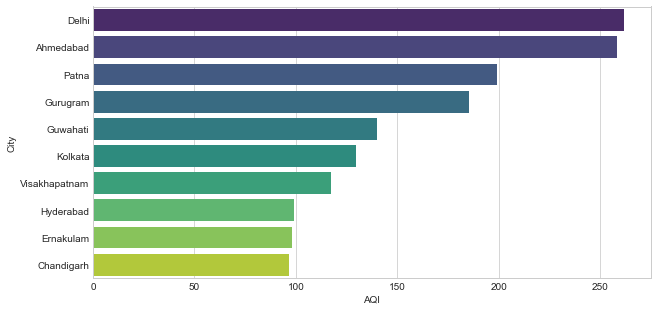

In [81]:
#Grouping the AQI by city and calculating the average AQI per city
x=pd.DataFrame(df_EDA.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='AQI', ylabel='City'>

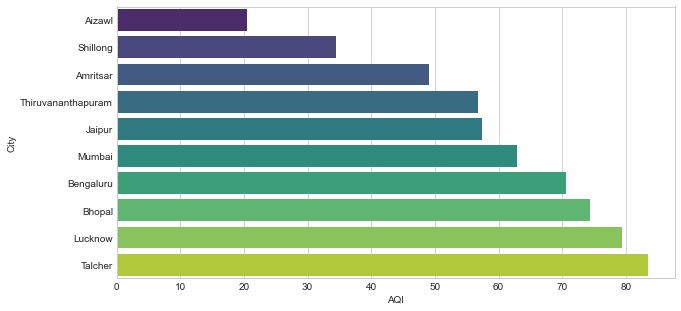

In [82]:
#Grouping the AQI by city and calculating the average AQI per city
x=pd.DataFrame(df_EDA.groupby(['City'])[['AQI']].mean().sort_values(by='AQI',ascending=True).head(10))
x=x.reset_index('City')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(data=x,x='AQI',y='City',orient='h',palette='viridis')

<AxesSubplot:xlabel='AQI', ylabel='State'>

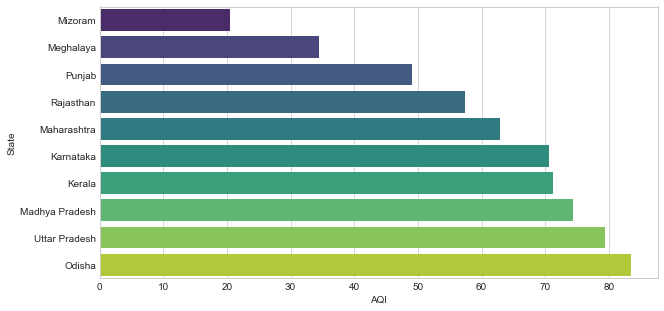

In [83]:
#Grouping the AQI by city and calculating the average AQI per city
x=pd.DataFrame(df_EDA.groupby(['State'])[['AQI']].mean().sort_values(by='AQI',ascending=True).head(10))
x=x.reset_index('State')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(data=x,x='AQI',y='State',orient='h',palette='viridis')

<AxesSubplot:xlabel='AQI', ylabel='State'>

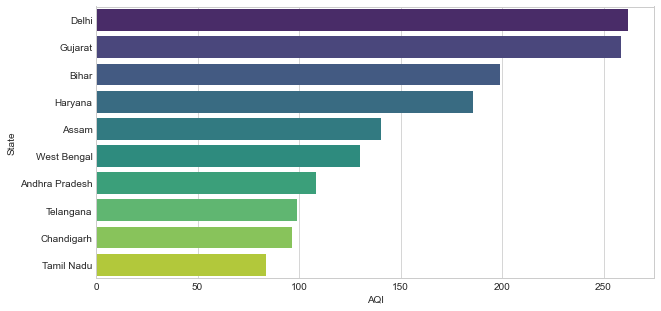

In [84]:
#Grouping the AQI by city and calculating the average AQI per city
x=pd.DataFrame(df_EDA.groupby(['State'])[['AQI']].mean().sort_values(by='AQI',ascending=False).head(10))
x=x.reset_index('State')

#plotting the average AQI per city
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(data=x,x='AQI',y='State',orient='h',palette='viridis')

It is clear from the above 4 graphs that
   * Delhi is the city which is highly polluted and Ahemadabad is also almost same as Delhi
   * Aizawl and Shillong are the two cities which aare less polluted. This gives an idea that North-east cities are not likely polluted
   * Mizoram is the state which is less polluted and Delhi is the one which is highly polluted in terms of AQI